In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models
from keras import layers

from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [7]:
def vectorize_seqs(seqs, dims=10000):
    res = np.zeros((len(seqs), dims))
    for i,s in enumerate(seqs):
        res[i, s] = 1.
    return res

In [9]:
from keras.utils.np_utils import to_categorical
train_x = vectorize_seqs(train_data)
test_x = vectorize_seqs(test_data)

train_y = to_categorical(train_labels)
test_y = to_categorical(test_labels)

In [10]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(8982, 10000)
(2246, 10000)
(8982, 46)
(2246, 46)


In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
valid_x = train_x[:1000]
partial_train_x = train_x[1000:]

valid_y = train_y[:1000]
partial_train_y = train_y[1000:]

In [15]:
history = model.fit(partial_train_x, partial_train_y, 
          epochs=20, 
          batch_size=512, 
          validation_data=(valid_x, valid_y))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 266us/step - loss: 2.4985 - acc: 0.4915 - val_loss: 1.6833 - val_acc: 0.6440
Epoch 2/20
7982/7982 [==============================] - 1s 180us/step - loss: 1.3941 - acc: 0.7043 - val_loss: 1.2824 - val_acc: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.0493 - acc: 0.7696 - val_loss: 1.1190 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.8244 - acc: 0.8280 - val_loss: 1.0248 - val_acc: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.6599 - acc: 0.8638 - val_loss: 0.9738 - val_acc: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.5251 - acc: 0.8929 - val_loss: 0.9215 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.4291 - a

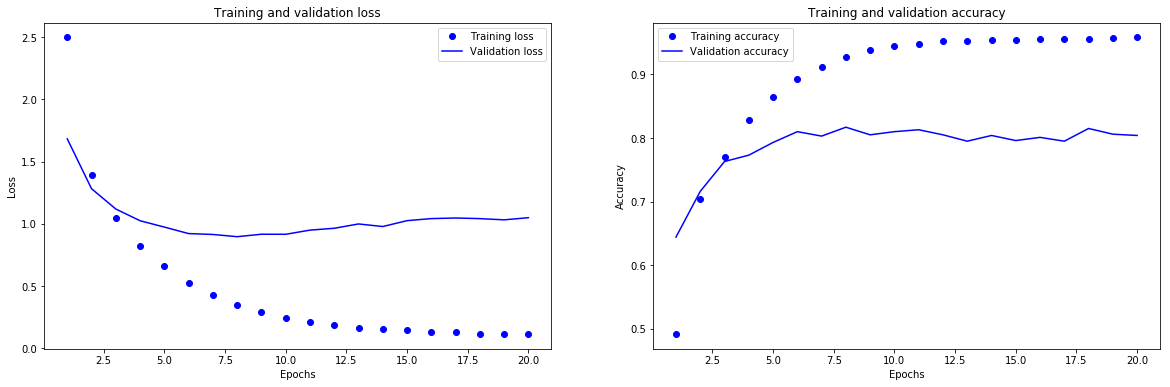

In [17]:
history_dict = history.history

loss_vals = history_dict['loss']
valid_loss_vals = history_dict['val_loss']
acc_vals = history_dict['acc']
valid_acc_vals = history_dict['val_acc']

epochs = range(1, len(loss_vals)+1)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_vals, 'bo', label='Training loss')
plt.plot(epochs, valid_loss_vals, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_vals, 'bo', label='Training accuracy')
plt.plot(epochs, valid_acc_vals, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_train_x, partial_train_y, 
          epochs=9, 
          batch_size=512, 
          validation_data=(valid_x, valid_y))

result = model.evaluate(test_x, test_y)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 175us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 141us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [19]:
result

[1.0224982713442876, 0.7756010686194165]

In [20]:
preds = model.predict(test_x)
print(np.sum(preds[0]))
print(np.argmax(preds[0]))

0.9999999
3
